## Importing required libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.metrics import classification_report, confusion_matrix

## Importing IRIS dataset 

In [ ]:
data = pd.read_csv("IRIS.csv")
data

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [6]:
data.size

750

In [7]:
data.shape

(150, 5)

In [14]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [15]:
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

## Splitting data into training and test datasets

In [19]:
x = data.drop(columns=["species"])
y = data['species']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

In [23]:
x_train.head(3)

,sepal_length,sepal_width,petal_length,petal_width
13,4.3,3.0,1.1,0.1
15,5.7,4.4,1.5,0.4
61,5.9,3.0,4.2,1.5


In [25]:
y_train.tail(3)

104    Iris-virginica
129    Iris-virginica
122    Iris-virginica
Name: species, dtype: object

## Implementing Decision Tree Classifier

In [26]:
clf = DecisionTreeClassifier()

In [28]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

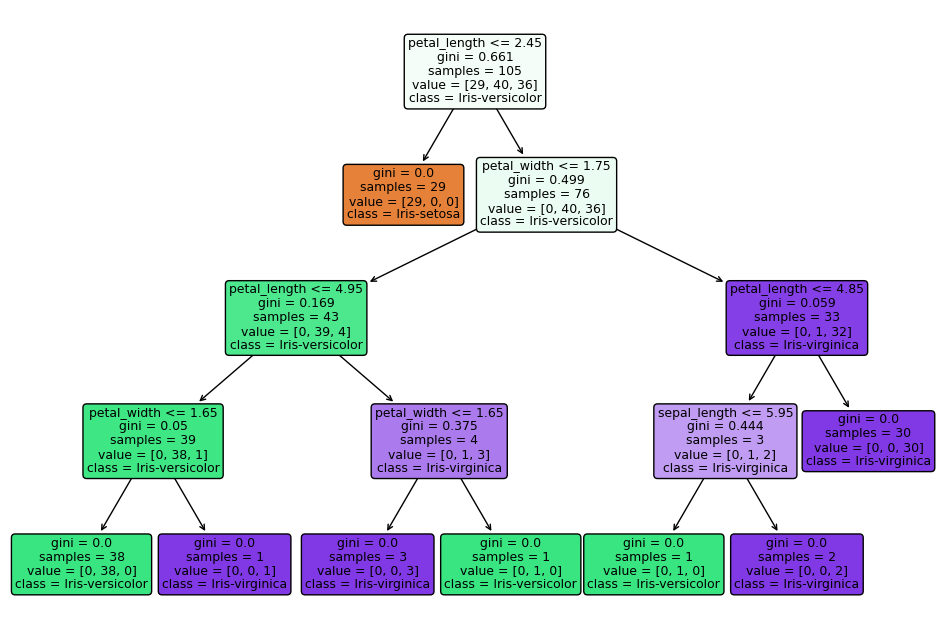

In [48]:
plt.figure(figsize=(12,8))
dec_tree = plot_tree(decision_tree=clf, feature_names=x.columns, class_names=["Iris-setosa",'Iris-versicolor','Iris-virginica'],filled=True,rounded=True)
plt.savefig("Two.png")

###  Classification report

In [53]:
y_pred = clf.predict(x_test)
Y_pred = clf.predict(x_train)
print("Classification report - \n",classification_report(y_test,y_pred))

Classification report - 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



In [54]:
print("\nClassification report- \n",classification_report(y_train,Y_pred))


Classification report- 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        29
Iris-versicolor       1.00      1.00      1.00        40
 Iris-virginica       1.00      1.00      1.00        36

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105



### Confusion Matrix

In [36]:
%matplotlib inline

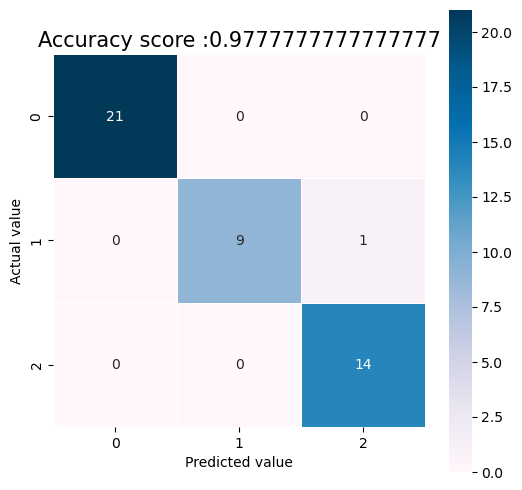

In [38]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(data=cm, linewidths=.5, annot=True, square=True, cmap='PuBu')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
all_sample_title = 'Accuracy score :{0}'.format(clf.score(x_test,y_test))
plt.title(all_sample_title,size=15)
plt.savefig("one.png")

In [39]:
confusion_matrix(y_test,y_pred)

array([[21,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 14]], dtype=int64)

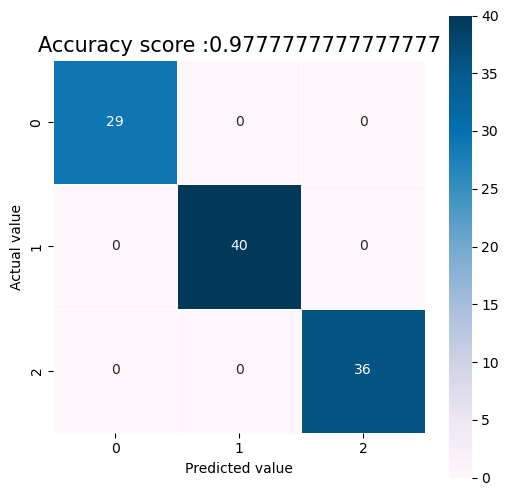

In [55]:
cm = confusion_matrix(y_train,Y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(data=cm, linewidths=.5, annot=True, square=True, cmap='PuBu')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
all_sample_title = 'Accuracy score :{0}'.format(clf.score(x_test,y_test))
plt.title(all_sample_title,size=15)
plt.savefig("one.png")

In [56]:
confusion_matrix(y_train,Y_pred)

array([[29,  0,  0],
       [ 0, 40,  0],
       [ 0,  0, 36]], dtype=int64)